In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')
df

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
...,...,...,...,...
886,NaN,211536,3,0
887,B42,112053,3,1
888,NaN,W./C. 6607,1,0
889,C148,111369,2,1


7


<Axes: xlabel='number'>

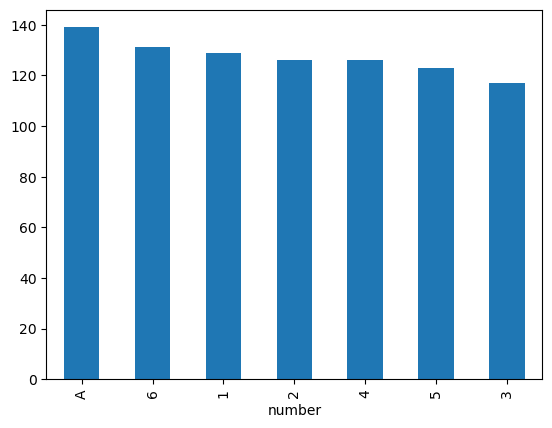

In [3]:
print(df['number'].nunique())
df['number'].value_counts().plot.bar()

In [4]:
df.isnull().sum()

Cabin       687
Ticket        0
number        0
Survived      0
dtype: int64

## extract numerical Number

In [5]:
df['Number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')
df

,Cabin,Ticket,number,Survived,Number_numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN
...,...,...,...,...,...
886,NaN,211536,3,0,3.0
887,B42,112053,3,1,3.0
888,NaN,W./C. 6607,1,0,1.0
889,C148,111369,2,1,2.0


## extract categorical Number

In [6]:
df['Number_categorical'] = np.where(df['Number_numerical'].isnull(),df['number'],np.nan)
df

,Cabin,Ticket,number,Survived,Number_numerical,Number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN
887,B42,112053,3,1,3.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN
889,C148,111369,2,1,2.0,NaN


In [8]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,Number_numerical,Number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

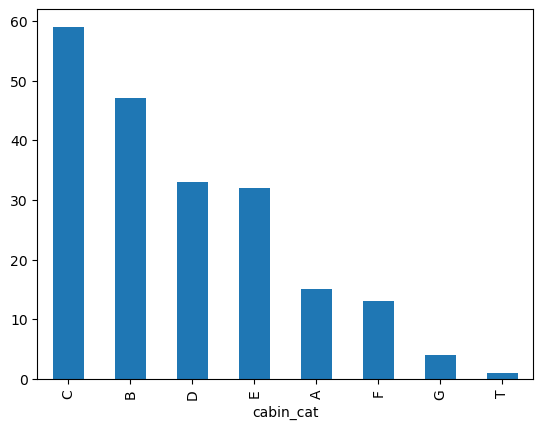

In [9]:
df['cabin_cat'].value_counts().plot(kind='bar')

### extract the last bit of ticket as number

In [11]:
df['ticket_num'] = df['Ticket'].apply(lambda x: x.split()[-1])

df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')
df

,Cabin,Ticket,number,Survived,Number_numerical,Number_categorical,cabin_num,cabin_cat,ticket_num
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0
3,C123,113803,3,1,3.0,NaN,123,C,113803.0
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0
...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0
887,B42,112053,3,1,3.0,NaN,42,B,112053.0
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0
889,C148,111369,2,1,2.0,NaN,148,C,111369.0


### extract the first part of ticket as category

In [14]:
df['ticket_cat'] = df['Ticket'].apply(lambda x:x.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [15]:
df

,Cabin,Ticket,number,Survived,Number_numerical,Number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.0,NaN,42,B,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.0,NaN,148,C,111369.0,NaN


In [17]:
df['ticket_cat'].value_counts()

ticket_cat
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64